In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [3]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("hopland"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all
Train Basin File Exists: True


In [4]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("hopland_gage.yaml")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [5]:
lstmNoPhysics.train()

2024-12-12 16:53:22,799: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165322\output.log initialized.
2024-12-12 16:53:22,802: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165322
2024-12-12 16:53:22,804: ### Run configurations for testing_run
2024-12-12 16:53:22,806: experiment_name: testing_run
2024-12-12 16:53:22,808: train_basin_file: hopland
2024-12-12 16:53:22,809: validation_basin_file: hopland
2024-12-12 16:53:22,810: test_basin_file: hopland
2024-12-12 16:53:22,811: train_start_date: 1994-10-01 00:00:00
2024-12-12 16:53:22,812: train_end_date: 2002-09-30 00:00:00
2024-12-12 16:53:22,813: validation_start_date: 2002-10-01 00:00:00
2024-12-12 16:53:22,815: validation_end_date: 2005-09-30 00:00:00
2024-12-12 16:53:22,817: test_start_date: 2005-10-01 00:00:00
2024-12-12 16:53:22,818: test_end_date: 2009-09-30 00:00:00
2024-12-12 16:53:22,820: device: cpu
2024-12-12 16:53:22,822: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]
2024-12-12 16:54:08,496: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165322\test\model_epoch032\test_metrics.csv
2024-12-12 16:54:08,499: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165322\test\model_epoch032\test_results.p


Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

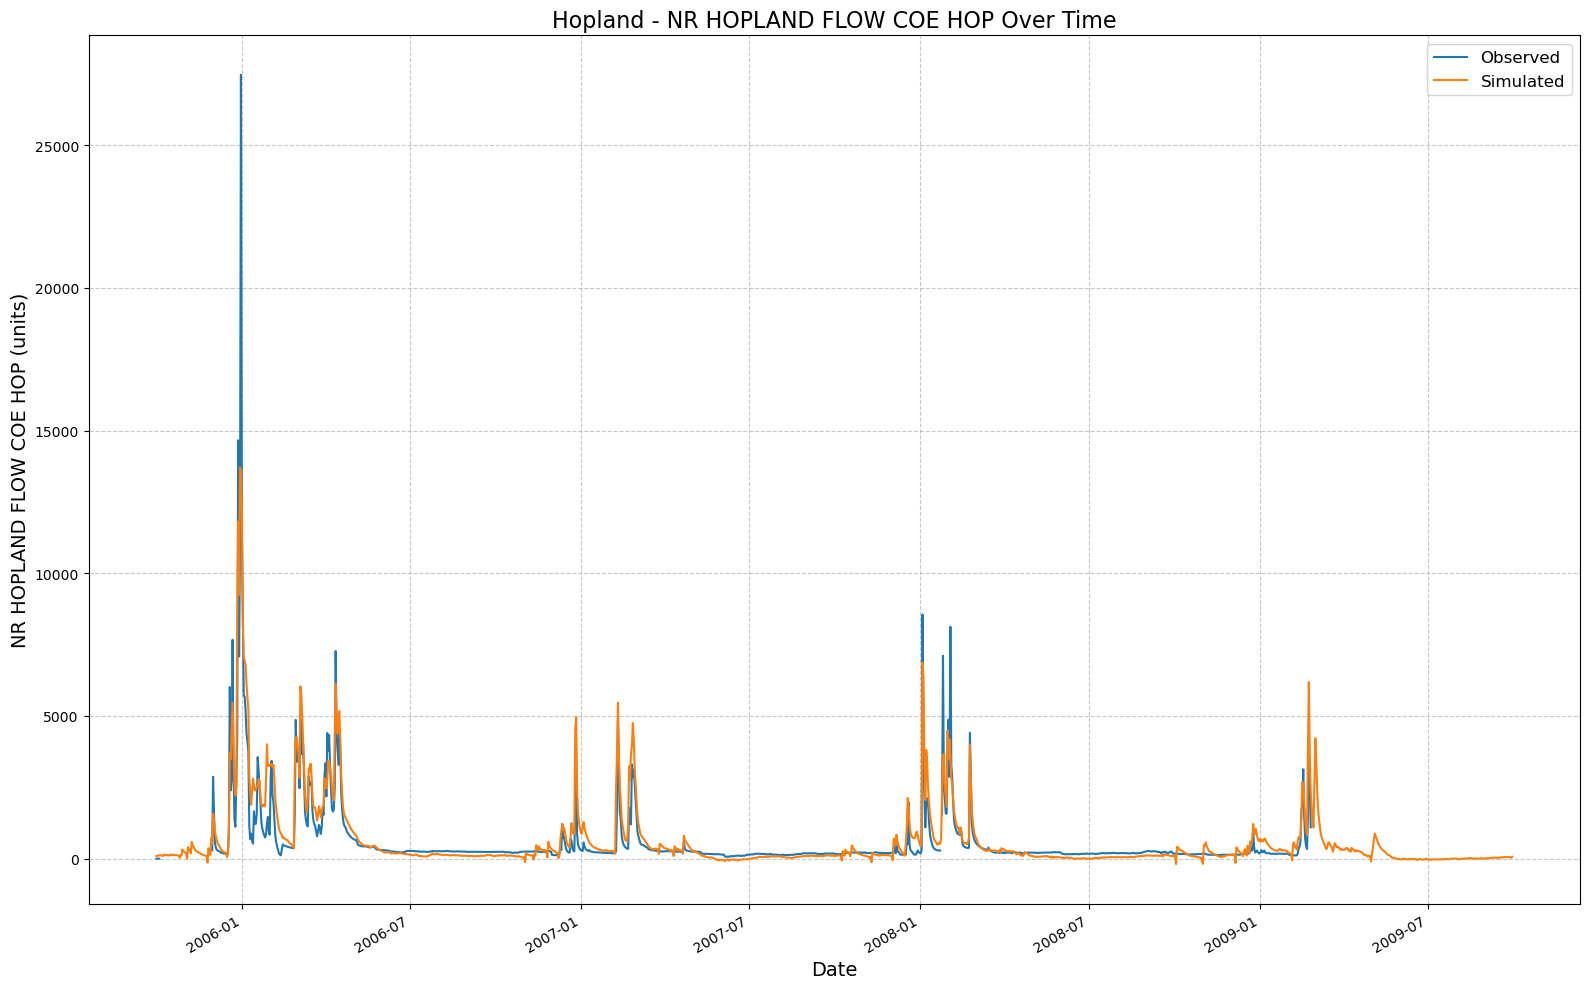

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165322\results_output.csv


{'NSE': 0.7839454710483551,
 'MSE': 427900.21875,
 'RMSE': 654.1408248611303,
 'KGE': 0.8066842277091117,
 'Alpha-NSE': 0.9755656307197035,
 'Beta-KGE': 1.1584348678588867,
 'Beta-NSE': 0.06826371867930402,
 'Pearson-r': 0.8919613862508697,
 'FHV': -3.0026454478502274,
 'FMS': 153.63881736429713,
 'FLV': 20.425246607257833,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 32.75390148162842}

In [6]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data:

In [8]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Hopland_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    

    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [9]:
lstmPhysics.train()

2024-12-12 16:54:09,319: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165409\output.log initialized.
2024-12-12 16:54:09,320: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165409
2024-12-12 16:54:09,322: ### Run configurations for testing_run
2024-12-12 16:54:09,324: experiment_name: testing_run
2024-12-12 16:54:09,326: train_basin_file: hopland
2024-12-12 16:54:09,330: validation_basin_file: hopland
2024-12-12 16:54:09,332: test_basin_file: hopland
2024-12-12 16:54:09,334: train_start_date: 1994-10-01 00:00:00
2024-12-12 16:54:09,336: train_end_date: 2002-09-30 00:00:00
2024-12-12 16:54:09,337: validation_start_date: 2002-10-01 00:00:00
2024-12-12 16:54:09,339: validation_end_date: 2005-09-30 00:00:00
2024-12-12 16:54:09,340: test_start_date: 2005-10-01 00:00:00
2024-12-12 16:54:09,342: test_end_date: 2009-09-30 00:00:00
2024-12-12 16:54:09,343: device: cpu
2024-12-12 16:54:09,343: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]
2024-12-12 16:54:50,011: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165409\test\model_epoch032\test_metrics.csv
2024-12-12 16:54:50,014: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165409\test\model_epoch032\test_results.p


Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

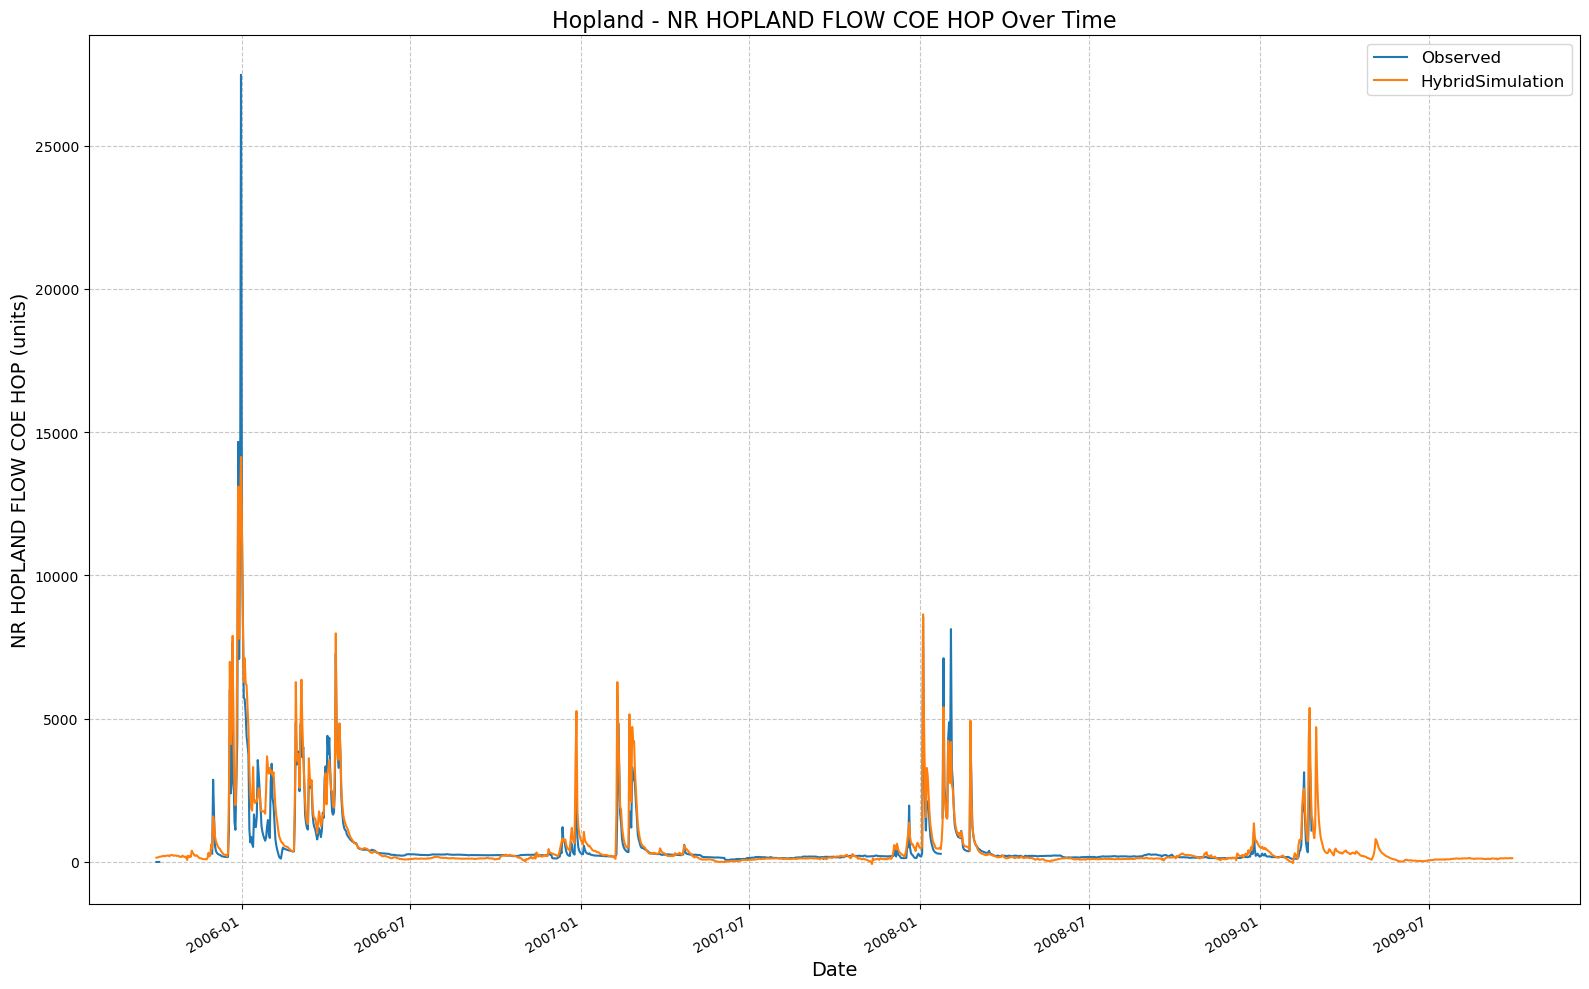

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165409\results_output.csv


{'NSE': 0.8320797979831696,
 'MSE': 332569.21875,
 'RMSE': 576.6881468783627,
 'KGE': 0.8640830208280393,
 'Alpha-NSE': 0.9647628318908004,
 'Beta-KGE': 1.099669098854065,
 'Beta-NSE': 0.0429437318881027,
 'Pearson-r': 0.9145726159566276,
 'FHV': -0.5602940917015076,
 'FMS': 101.59937851924963,
 'FLV': 3.8323292058168654,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 21.354470252990723}

In [10]:
lstmPhysics.results()

Now run physics informed lstm with HMS data with Lake Mendocino

In [16]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Hopland_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "Lake Mendocino Storage",    
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [18]:
lstmPhysics.train()

2024-12-12 16:57:39,827: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165739\output.log initialized.
2024-12-12 16:57:39,831: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165739
2024-12-12 16:57:39,834: ### Run configurations for testing_run
2024-12-12 16:57:39,835: experiment_name: testing_run
2024-12-12 16:57:39,839: train_basin_file: hopland
2024-12-12 16:57:39,842: validation_basin_file: hopland
2024-12-12 16:57:39,844: test_basin_file: hopland
2024-12-12 16:57:39,845: train_start_date: 1994-10-01 00:00:00
2024-12-12 16:57:39,846: train_end_date: 2002-09-30 00:00:00
2024-12-12 16:57:39,847: validation_start_date: 2002-10-01 00:00:00
2024-12-12 16:57:39,849: validation_end_date: 2005-09-30 00:00:00
2024-12-12 16:57:39,850: test_start_date: 2005-10-01 00:00:00
2024-12-12 16:57:39,852: test_end_date: 2009-09-30 00:00:00
2024-12-12 16:57:39,854: device: cpu
2024-12-12 16:57:39,855: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]
2024-12-12 16:58:22,203: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165739\test\model_epoch032\test_metrics.csv
2024-12-12 16:58:22,206: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165739\test\model_epoch032\test_results.p


Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

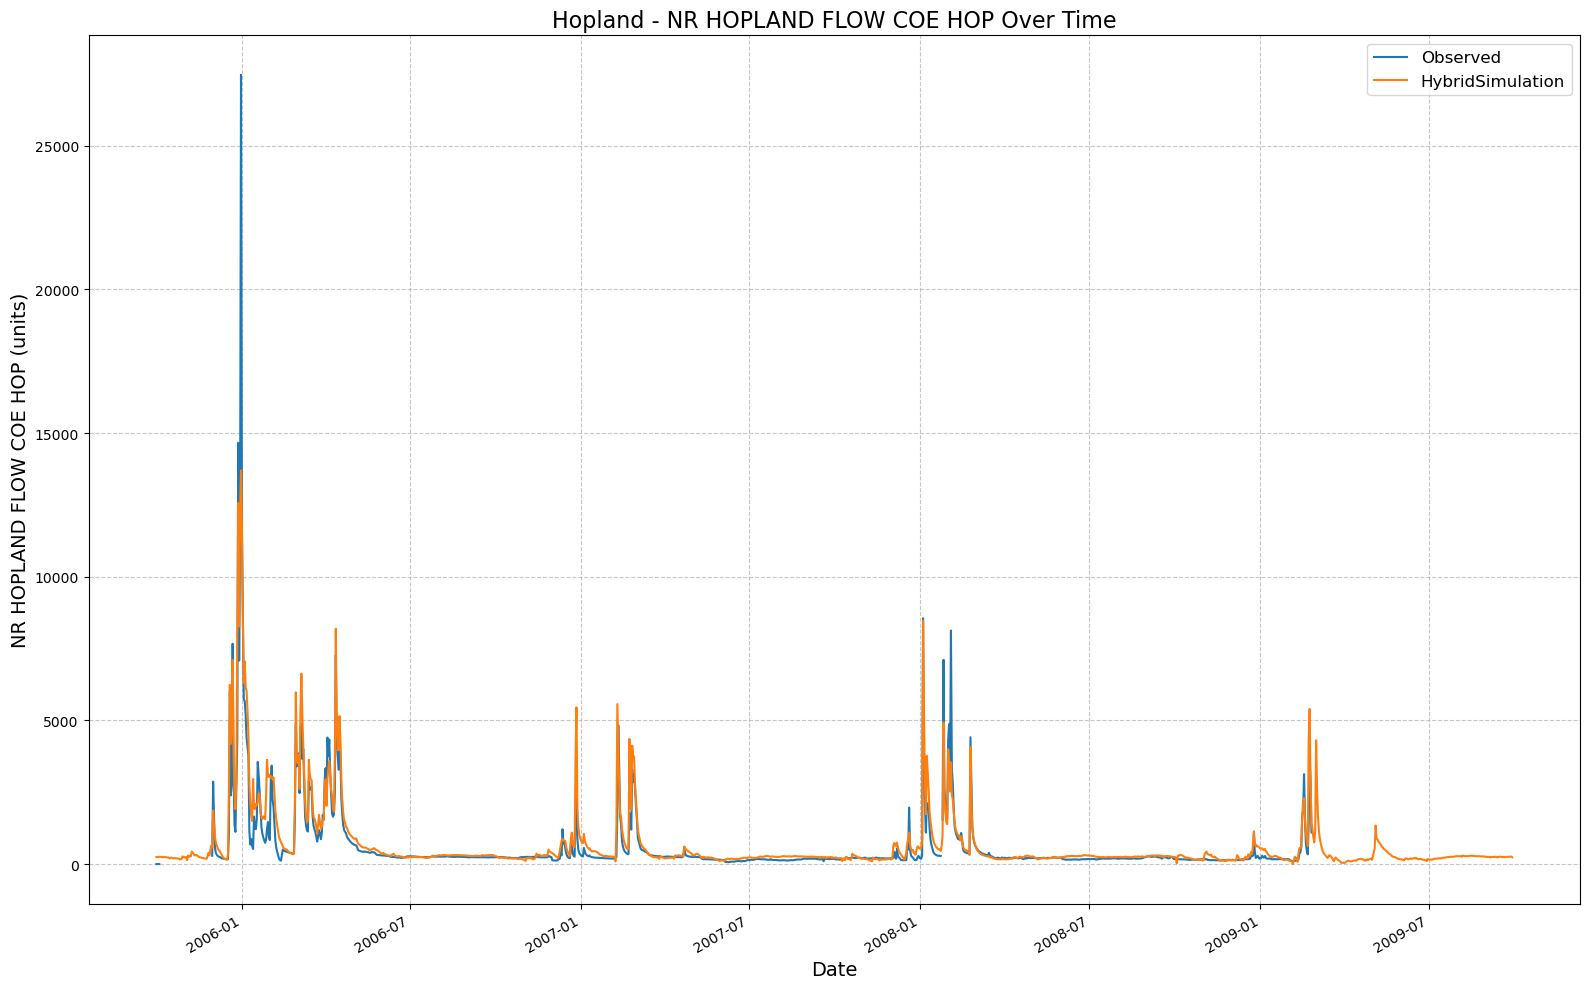

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1212_165739\results_output.csv


{'NSE': 0.8292538970708847,
 'MSE': 338166.0,
 'RMSE': 581.5204209655926,
 'KGE': 0.7741973241892823,
 'Alpha-NSE': 0.9320203121276948,
 'Beta-KGE': 1.1977423429489136,
 'Beta-NSE': 0.08519983078720468,
 'Pearson-r': 0.9147733830007416,
 'FHV': -1.7464179545640945,
 'FMS': 21.402116803380952,
 'FLV': 71.9579285425913,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 24.183533191680908}

In [19]:
lstmPhysics.results()

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [23]:
import xarray as xr

In [25]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the capella.csv thy gave us
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

     # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "hopland_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2) #color="blue",
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.8) #color="purple",
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.7) #color="orange",
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.7) #color="lightblue",

    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

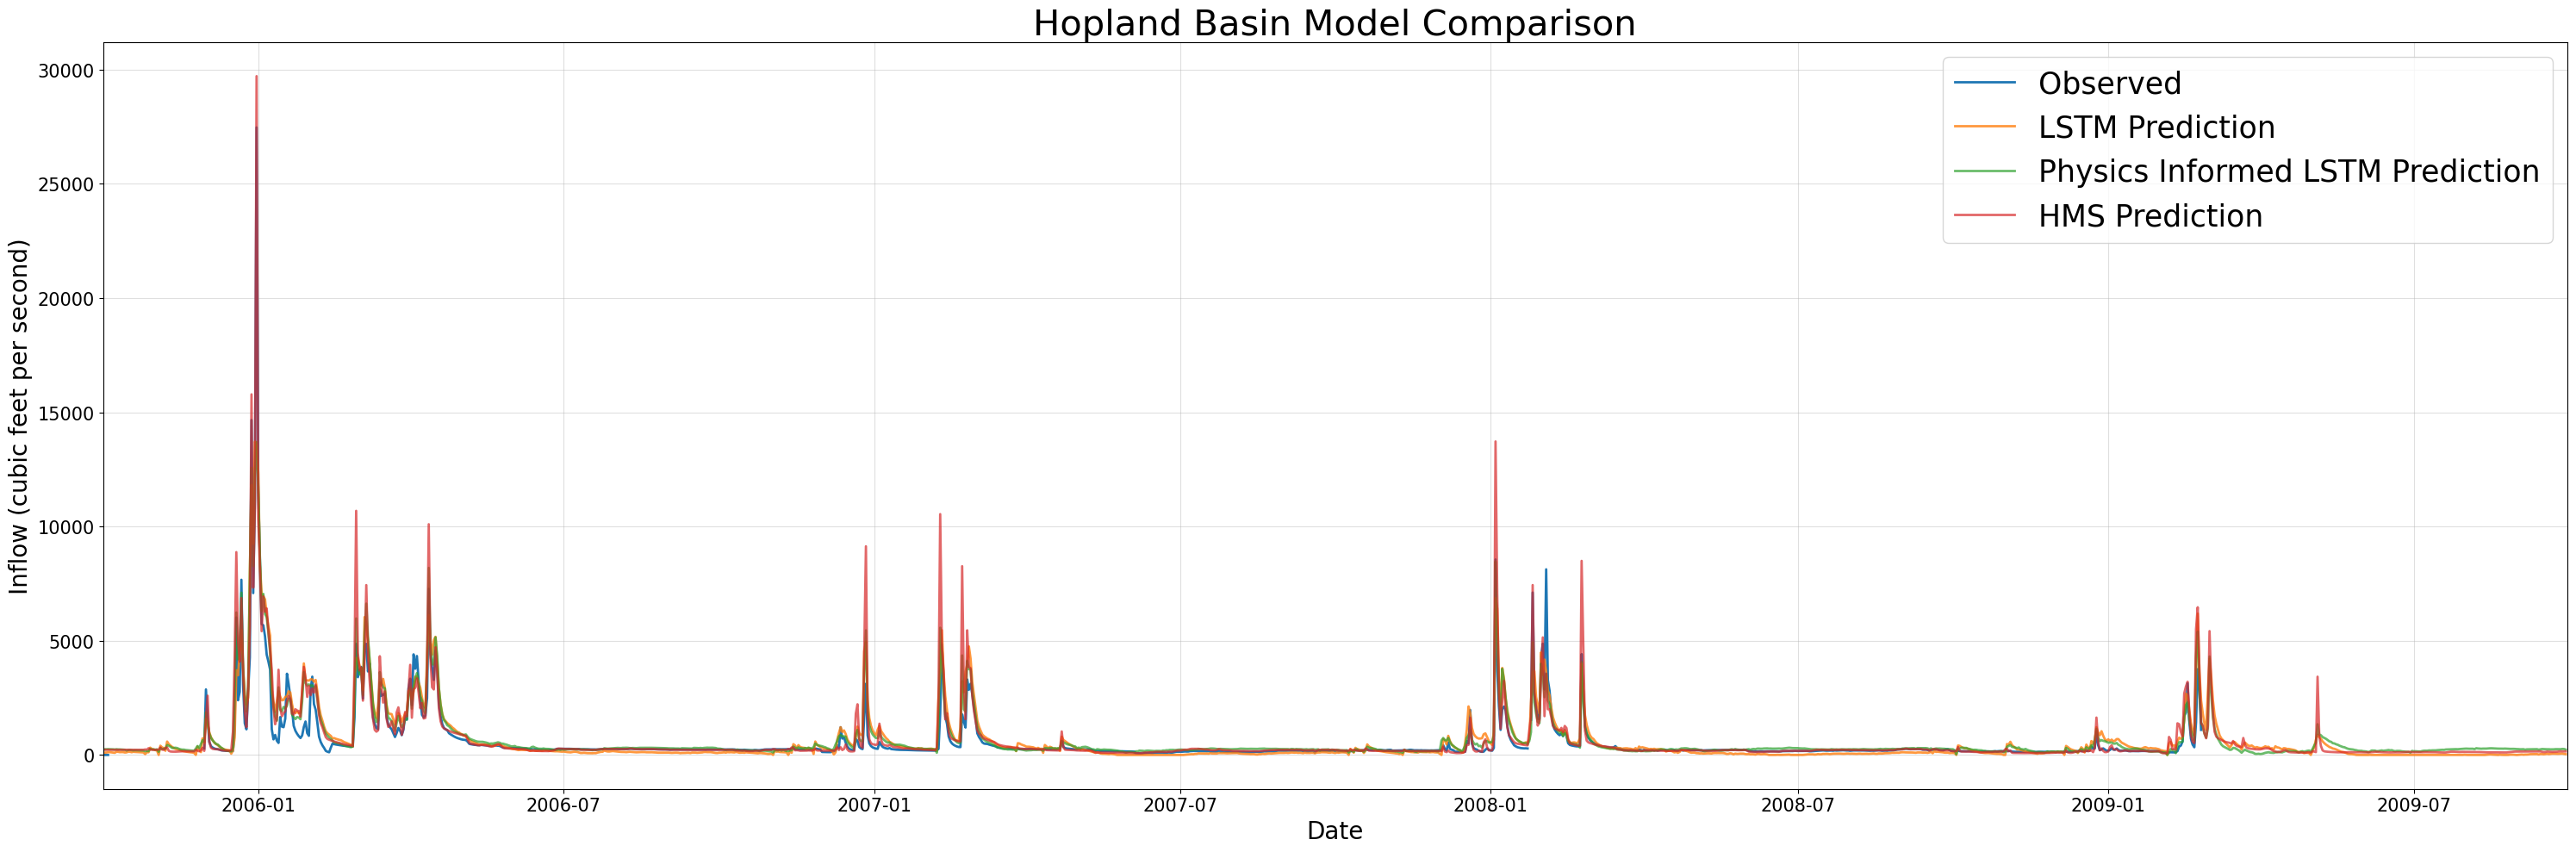

In [27]:
#change the paths to the respective ouptut csvs from running.result()
lstm_result_path = Path('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1212_165322/results_output.csv')
physics_informed_result_path = Path('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1212_165739/results_output.csv')
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Hopland_daily.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Hopland Basin Model Comparison')